# Project report (title)

## Name (ID)

## Question 1


### Introduction

The purpose of this project was to use...

### Procedure

Here you need to describe what you did to solve this question, include proofs, algorithms etc...


In [3]:

import numpy as np
import matplotlib.pyplot as plt


In [4]:
def der_central(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)


def der_backwards(f, x, h):
    return (f(x + h) - f(x)) / h


def der_forwards(f, x, h):
    return (f(x) - f(x-h)) / h


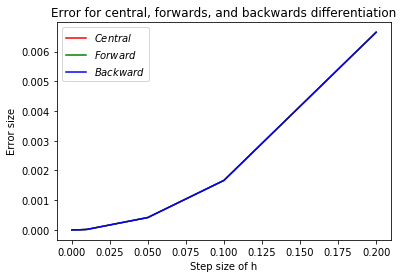

In [5]:
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
x = np.pi
h_step = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
central_error = []
backward_error = []
forward_error = []

for h in h_step:
    central_error.append(np.abs(df(x) - der_central(f, x, h)))
    backward_error.append(np.abs(df(x) - der_backwards(f, x, h)))
    forward_error.append(np.abs(df(x) - der_forwards(f, x, h)))


plt.plot(h_step, central_error, 'r', label='$Central$')
plt.plot(h_step, forward_error, 'g', label='$Forward$')
plt.plot(h_step, backward_error, 'b', label='$Backward$')
plt.legend()
plt.title("Error for central, forwards, and backwards differentiation")
plt.xlabel("Step size of h")
plt.ylabel("Error size")
plt.show()


In [6]:
def p(E, h):
    powers = []
    for i in range(0, len(h_step)-1):
        powers.append(np.log(E[i]/E[i+1])/np.log(h[i]/h[i+1]))
    return powers

print(np.average(p(central_error, h_step)))
print(np.average(p(backward_error, h_step)))
print(np.average(p(forward_error, h_step)))


1.9997154752429829
1.9997154758612827
1.999715481163221


### Observations

Here you need to describe the results including graphs.

### Discussion

Here you need to include any interpretations or inferences that you draw on the basis of your observations

### Conclusions

Write a summary of your most important findings







## Question 2

Repeat the previous structure...

### Introduction

The purpose of this project was to use...

### Procedure

Here you need to describe what you did to solve this question, include proofs, algorithms etc...


In [7]:
def midpointquad(func, a, b, N):
    x = np.linspace(a, b, N)
    total = 0
    for k in range(0, len(x)-1):
        total += ((x[k+1]-x[k])*func((x[k]+x[k+1])/2))
    return total


In [8]:
f = lambda x:1/(1+x**2)
int_f = 2*np.arctan(5)

print("{:5s} {:5s} {:17s} {:15s}".format("N","h", "Midpoint", "Error"))
for n in (11, 101, 1001, 10001):
    mid = midpointquad(f, -5, 5, n)
    print("{:5d} {:.3f} {:.15f} {:.2E}".format(n, (10 / (n - 1)), mid, np.abs(int_f-mid)))


N     h     Midpoint          Error          
   11 1.000 2.736307727635371 1.05E-02
  101 0.100 2.746813859774802 1.23E-05
 1001 0.010 2.746801657164037 1.23E-07
10001 0.001 2.746801535122770 1.23E-09


In [9]:
func1 = midpointquad(lambda x: 1     , 0, 1, 2)
func2 = midpointquad(lambda x: 2*x   , 0, 1, 2)
func3 = midpointquad(lambda x: 3*x**2, 0, 1, 2)
func4 = midpointquad(lambda x: 4*x**3, 0, 1, 2)

print("{:5s} {:8s} {:15s}".format("func", "Midpoint", "Error"))
print("{:5s} {:.6f} {:.2f}".format("1",    func1, np.abs(1 - func1)))
print("{:5s} {:.6f} {:.2f}".format("2x",   func2, np.abs(1 - func2)))
print("{:5s} {:.6f} {:.2f}".format("3x^2", func3, np.abs(1 - func3)))
print("{:5s} {:.6f} {:.2f}".format("4x^3", func4, np.abs(1 - func4)))


func  Midpoint Error          
1     1.000000 0.00
2x    1.000000 0.00
3x^2  0.750000 0.25
4x^3  0.500000 0.50


In [10]:
def trapezoid(func, a, b, N):
    x = np.linspace(a, b, N)
    total = 0
    h = np.abs(b-a)/(N-1)


    for k in range(0, len(x)-1):
        x1 = func(x[k])
        x2 = func(x[k+1])

        total += ((x1 + x2)/2) * h
    return total


In [11]:

print("{:5s} {:5s} {:17s} {:15s}".format("N","h", "Midpoint", "Error"))
for n in (11, 101, 1001, 10001):
    mid = trapezoid(f, -5, 5, n)
    print("{:5d} {:.3f} {:.15f} {:.2E}".format(n, (10 / (n - 1)), mid, np.abs(int_f-mid)))



N     h     Midpoint          Error          
   11 1.000 2.756108597285068 9.31E-03
  101 0.100 2.746776880807908 2.47E-05
 1001 0.010 2.746801287341880 2.47E-07
10001 0.001 2.746801531424546 2.47E-09


In [12]:
func1 = trapezoid(lambda x: 1     , 0, 1, 2)
func2 = trapezoid(lambda x: 2*x   , 0, 1, 2)
func3 = trapezoid(lambda x: 3*x**2, 0, 1, 2)
func4 = trapezoid(lambda x: 4*x**3, 0, 1, 2)


print("{:5s} {:8s} {:15s}".format("func", "Midpoint", "Error"))
print("{:5s} {:.6f} {:.2f}".format("1",    func1, np.abs(1 - func1)))
print("{:5s} {:.6f} {:.2f}".format("2x",   func2, np.abs(1 - func2)))
print("{:5s} {:.6f} {:.2f}".format("3x^2", func3, np.abs(1 - func3)))
print("{:5s} {:.6f} {:.2f}".format("4x^3", func4, np.abs(1 - func4)))


func  Midpoint Error          
1     1.000000 0.00
2x    1.000000 0.00
3x^2  1.500000 0.50
4x^3  2.000000 1.00


### Observations

Here you need to describe the results including graphs.

### Discussion

Here you need to include any interpretations or inferences that you draw on the basis of your observations

### Conclusions

Write a summary of your most important findings
